首先读入数据，Feature Exploration, Engineering and Cleaning

In [1]:
#！usr/bin/python
# coding ：utf-8
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


总览数据,可以看出以下特点:
训练集
1、一共有891组数据
2、其中 Age、Cabin、Embarked有缺失项

测试集
1、一共有418组数据
2、其中 Age、Fare、Cabin存在缺失项


In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


训练集上可以看出：
1、大概38％人活下来了
2、平均年龄在29岁左右，最老为80岁，最小为0.42岁(不包括空缺年龄)


In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


接下来进行数据的可视化，进一步分析数据
1、看看Pclass和获救的关系

Text(0,0.5,u'\u751f\u5b58\u60c5\u51b5')

<Figure size 432x288 with 0 Axes>

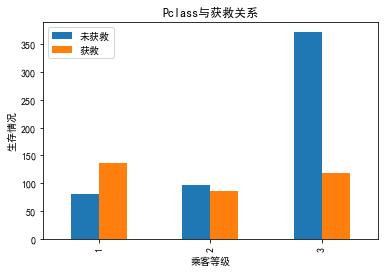

In [5]:
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family']='sans-serif'

fig = plt.figure()
fig.set(alpha = 0.2)

No_Survived = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived = data_train.Pclass[data_train.Survived == 1].value_counts()

df = pd.DataFrame({u'获救':Survived,u'未获救':No_Survived})
df.plot(kind = 'bar',title = u'Pclass与获救关系')
plt.xlabel(u'乘客等级')
plt.ylabel(u'生存情况')

可以看出船舱等级越高，获救几率越高 1>2>3  Pclass特征很重要

下面看年龄与生存情况

c:\python27\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


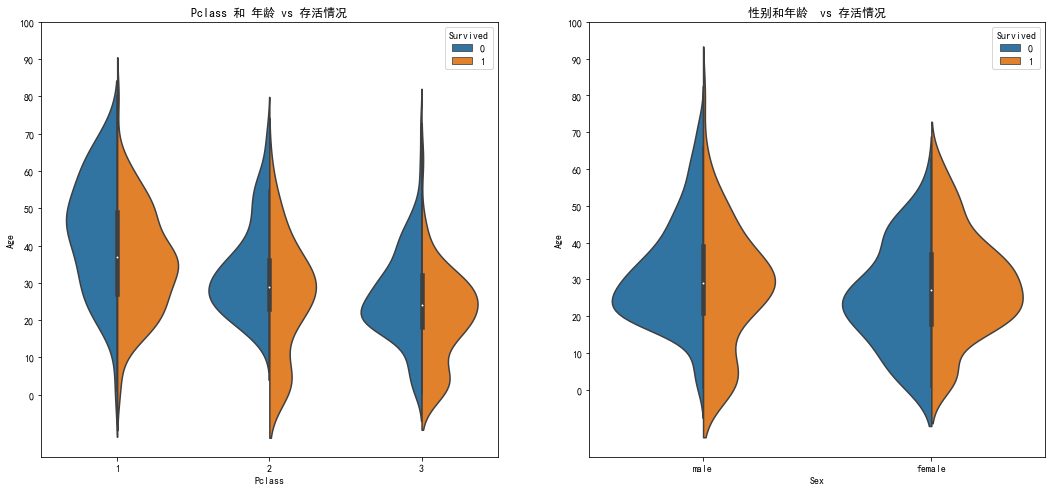

In [6]:
import seaborn as sns


fig,ax = plt.subplots(1,2,figsize = (18,8))
fig.set(alpha = 0.2)
sns.violinplot('Pclass','Age',hue = 'Survived',data = data_train,split = True ,ax= ax[0])
ax[0].set_title(u'Pclass 和 年龄 vs 存活情况')
ax[0].set_yticks(range(0,110,10))



sns.violinplot('Sex','Age',hue = 'Survived',data = data_train ,split = True ,ax = ax[1])
ax[1].set_title(u'性别和年龄  vs 存活情况')
ax[1].set_yticks(range(0,110,10))

fig.show()

分析总体的年龄分布
可以看出20-40岁的人数比较多

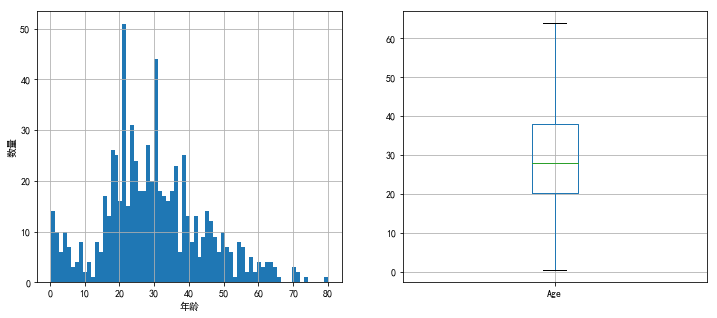

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(121)
data_train['Age'].hist(bins = 70)
plt.xlabel(u'年龄')
plt.ylabel(u'数量')


plt.subplot(122)
data_train.boxplot(column = 'Age',showfliers = False)
plt.show()

分析称呼与存活与否的关系  Name


In [8]:
data_train['Title'] = data_train['Name'].str.extract('([A-Za-z]+)\.',expand =False)
pd.crosstab(data_train['Title'],data_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


观察不同称呼存活率关系
 
可以看出称呼和存活率是存在一定关系的

<Figure size 432x288 with 0 Axes>

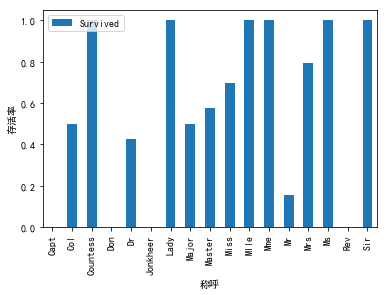

In [9]:
fig= plt.figure()

data_train[['Survived','Title']].groupby(['Title']).mean().plot(kind ='bar')
plt.xlabel(u'称呼')
plt.ylabel(u'存活率')
fig.show()

同时，可以考虑名字长度对生存率的影响
可以看出名字长的人比较容易获救

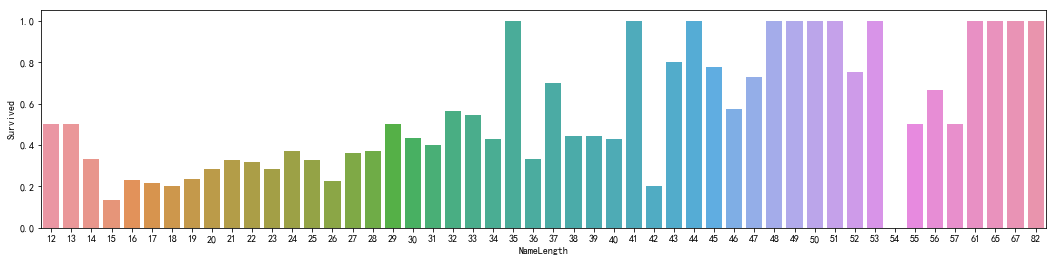

In [10]:
fig = plt.figure(figsize=(18,4))
data_train['NameLength'] = data_train['Name'].apply(len)
name_length = data_train[['NameLength','Survived']].groupby(['NameLength'],as_index = False).mean()
sns.barplot('NameLength','Survived',data=name_length)

接下来看有无兄弟姐妹与存活与否的关系
可见有兄弟姐妹存活率会高一些

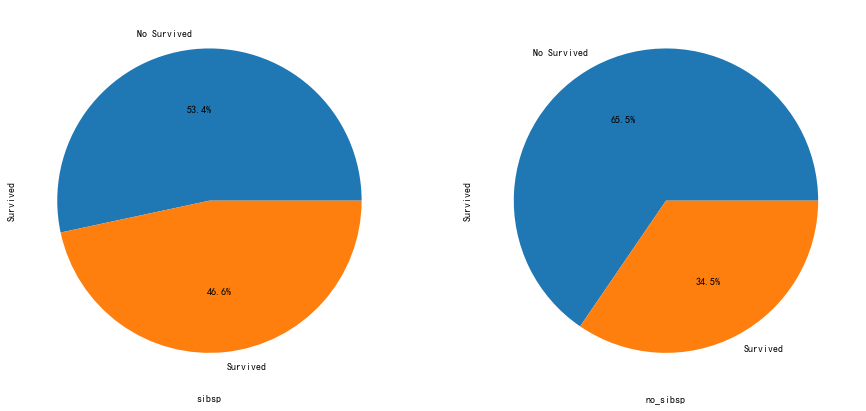

In [11]:
sibsp_df = data_train[data_train['SibSp'] != 0]
no_sibsp_df = data_train[data_train['SibSp'] == 0]


plt.figure(figsize=(15,7))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('sibsp')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_sibsp')

plt.show()

接下来看兄弟个数对存活率的影响

可以看出有1-2个兄弟可以提高存活率

Text(0.5,1,u'\u5144\u5f1f\u4e2a\u6570\u4e0e\u5b58\u6d3b\u7387\u5173\u7cfb')

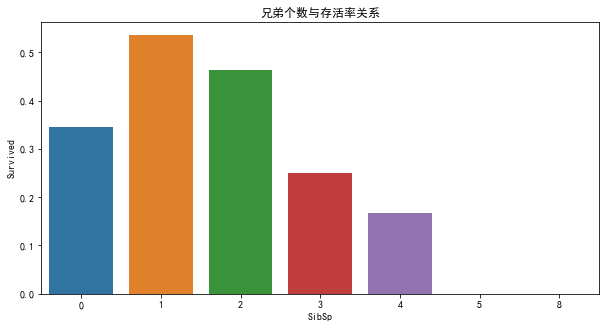

In [12]:
fig = plt.figure(figsize=(10,5))

sibsp_data = data_train[['Survived','SibSp']].groupby(['SibSp'],as_index =False).mean()

sns.barplot('SibSp','Survived',data=sibsp_data)
plt.title(u'兄弟个数与存活率关系')

有无父母子女和存活率的关系
可以看出有 1-3个亲人存活率会比较高

Text(0.5,1,u'\u7236\u6bcd\u5b50\u5973\u4e2a\u6570\u548c\u5b58\u6d3b\u7387\u7684\u5173\u7cfb')

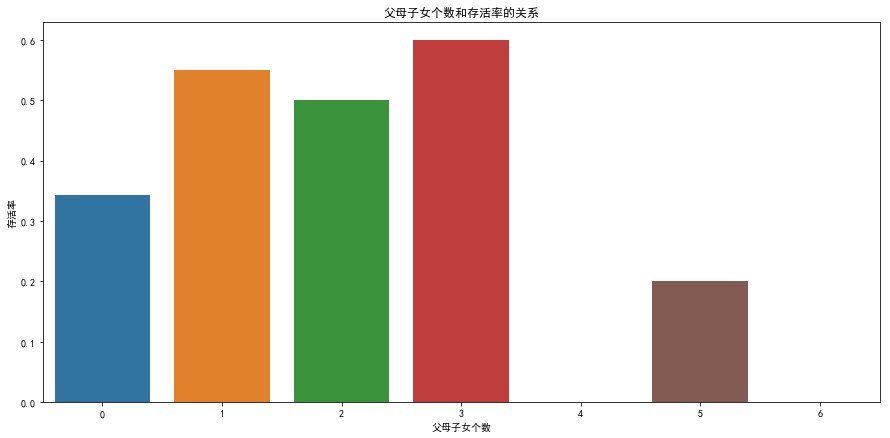

In [13]:
plt.figure(figsize=(15,7))

parch_data = data_train[['Survived','Parch']].groupby(['Parch'],as_index = False).mean()

sns.barplot('Parch','Survived',data = parch_data)
plt.xlabel(u'父母子女个数')
plt.ylabel(u'存活率')
plt.title(u'父母子女个数和存活率的关系')

整个家庭个数对存活率的影响

有2-3个家人可以提高存活率

<Figure size 1224x504 with 0 Axes>

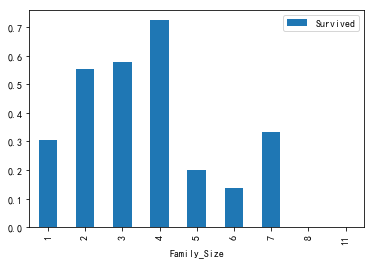

In [14]:
plt.figure(figsize=(17,7))
data_train['Family_Size'] = data_train['Parch']+data_train['SibSp']+1
data_train[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot(kind = 'bar')

票价分布，与存活率的关系
可以看出票价越高存活率也就越高

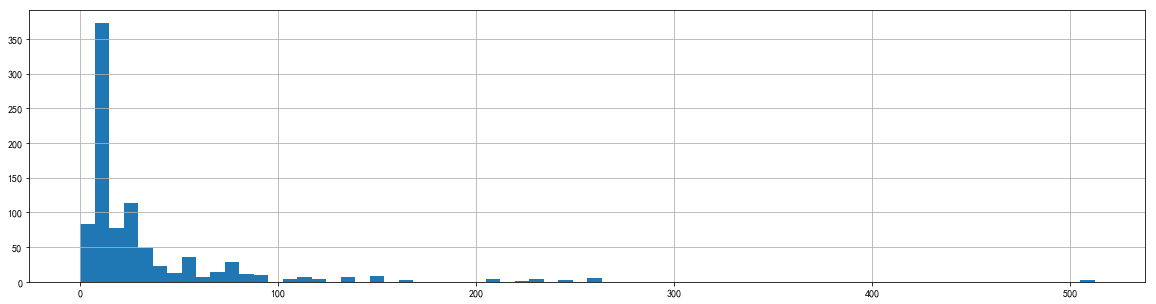

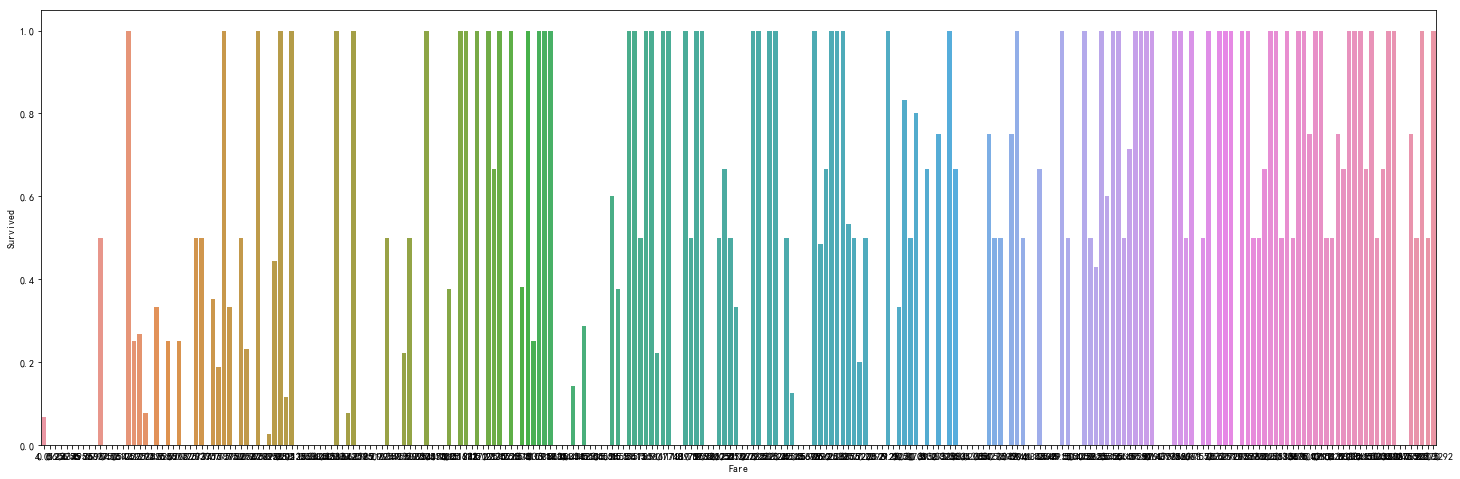

In [15]:
plt.figure(figsize=(20,5))
data_train['Fare'].hist(bins=70)


plt.figure(figsize=(25,8))

Fare_data = data_train[['Fare','Survived']].groupby(['Fare'],as_index = False).mean()
sns.barplot('Fare','Survived',data = Fare_data)

船舱类型与存活关系
船舱缺失值较多，做特征工程的时候，可以将有船舱编号的分为一类，将无船舱的分为一类


可以看出有船舱的存活率会比较高

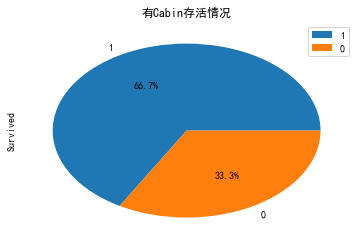

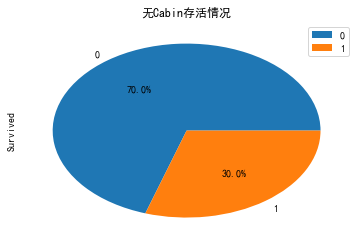

In [16]:
Cabin_Yes = data_train.loc[data_train['Cabin'].notnull()][['Survived','Cabin']]
Cabin_No  = data_train.loc[data_train['Cabin'].isnull()][['Survived','Cabin']]

plt.figure()
Cabin_Yes.Survived.value_counts().plot(kind = 'pie',autopct = '%1.1f%%',title = (u'有Cabin存活情况'),legend = True)
plt.figure()
Cabin_No.Survived.value_counts().plot(kind = 'pie',autopct="%1.1f%%",title = (u'无Cabin存活情况'),legend = True)

船舱类型与存活率的关系

可以看出B、D、E 三个船舱的存活率较高,A存活率最低

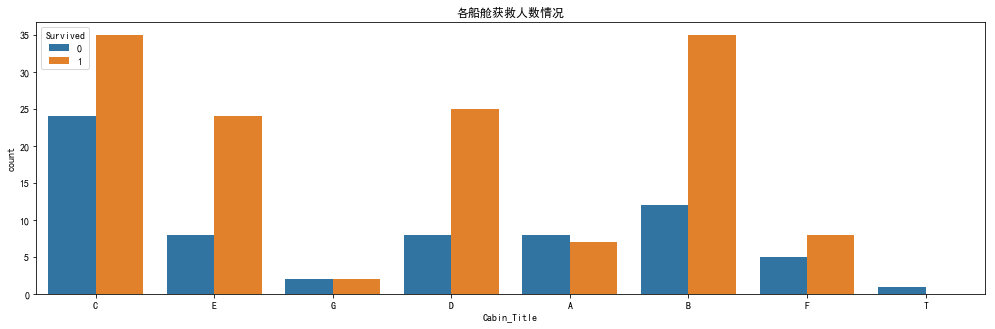

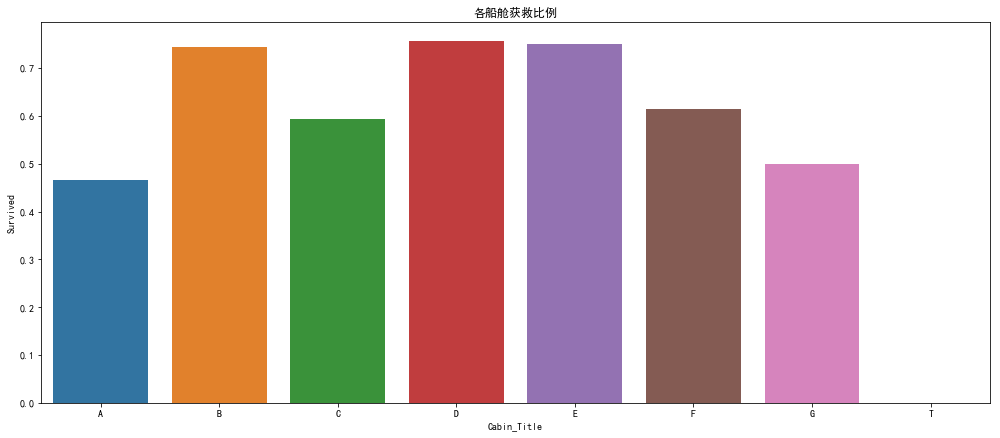

In [17]:
fig = plt.figure(figsize=(17,5))
fig.set(alpha =0.2)
Cabin_Yes['Cabin_Title'] = Cabin_Yes['Cabin'].str.extract('([A-Z])',expand = False)

sns.countplot('Cabin_Title',hue = 'Survived',data = Cabin_Yes)
plt.title(u'各船舱获救人数情况')

fig = plt.figure(figsize=(17,7))
plt.title(u'各船舱获救比例')
Cabin_Data =Cabin_Yes[['Survived','Cabin_Title']].groupby(['Cabin_Title'],as_index = False).mean()
sns.barplot("Cabin_Title","Survived",data = Cabin_Data)
plt.show()

港口和存活与否的关系  Embarked

Text(0.5,1,u'\u767b\u5cb8\u6e2f\u53e3\u548c\u5b58\u6d3b\u4eba\u6570\u60c5\u51b5')

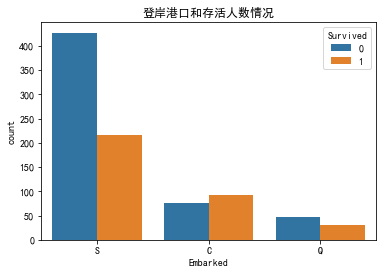

In [18]:
sns.countplot("Embarked",hue = 'Survived',data = data_train)
plt.title(u'登岸港口和存活人数情况')

可以看出C港口上岸的存活率最高、Q次之、S最低

Text(0,0.5,u'\u5b58\u6d3b\u7387')

<Figure size 432x288 with 0 Axes>

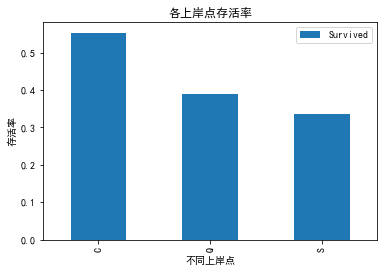

In [19]:
ax = plt.figure()
Embarked_Data = data_train[['Survived','Embarked']].groupby(['Embarked']).mean()
Embarked_Data.plot(kind = 'bar')
plt.title(u'各上岸点存活率')
plt.xlabel(u'不同上岸点')
plt.ylabel(u'存活率')

综上所述可以看出以下几点特征有显著影响:

1、船舱等级Pclass  1>2>3

2、年龄

3、称呼

4、名字长度

5、家人个数 2-3个能提高存活率

6、票价

7、有无船舱  有船舱的人存活率比较高

8、B、D、E船舱存活率较高

9、登船港口   C港口上岸的人存活率最高

10、性别

经过以上步骤，我们已经对数据有了初步认识。

接下来进行特征工程，数据的预处理

(1)首先填充样本中的缺失值
   1、年龄 Age
   2、船舱 Cabin
   3、登岸港口  Embarked

首先将train和test合并一起进行特征工程的处理

In [20]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_data['Survived'] = 0
combined_train_test = train_data.append(test_data)
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736


一、Embarked
   先填充缺失值，
   之后进行特征因子化

In [21]:
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0],inplace = True)
Embarked_dummies = pd.get_dummies(combined_train_test['Embarked'],prefix='Embarked')
combined_train_test = pd.concat([combined_train_test,Embarked_dummies],axis = 1)
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,0,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,0,0,1
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877,0,1,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463,0,0,1
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909,0,0,1
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742,0,0,1
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736,1,0,0


（2）性别  Sex
    无缺失值，直接分列即可

In [22]:
Sex_dummies = pd.get_dummies(combined_train_test['Sex'],prefix='Sex')
combined_train_test = pd.concat([combined_train_test,Sex_dummies],axis = 1)
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,0,1,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1,0,0,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,0,0,1,1,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,0,0,1,1,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,0,0,1,0,1
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877,0,1,0,0,1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463,0,0,1,0,1
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909,0,0,1,0,1
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742,0,0,1,1,0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736,1,0,0,1,0


(3)称呼 Name
   从名字中提取出称呼

In [23]:
combined_train_test['Name_Title'] = combined_train_test['Name'].str.extract('([A-Za-z]+)\.',expand = False)
combined_train_test.Name_Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Don           1
Capt          1
Lady          1
Sir           1
Countess      1
Jonkheer      1
Dona          1
Mme           1
Name: Name_Title, dtype: int64

对称呼进行统一

In [24]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
title_Dict.update(dict.fromkeys(['Jonkheer','Don','Sir','Countess','Dona','Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master'], 'Master'))

combined_train_test['Name_Title'] = combined_train_test['Name_Title'].map(title_Dict)

特征因子化

In [25]:
Name_Title_dummies = pd.get_dummies(combined_train_test['Name_Title'],prefix='Name_Title')
combined_train_test = pd.concat([combined_train_test,Name_Title_dummies],axis = 1)
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_S,Sex_female,Sex_male,Name_Title,Name_Title_Master,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Officer,Name_Title_Royalty
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,1,0,1,Mr,0,0,1,0,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,0,1,0,Mrs,0,0,0,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,1,1,0,Miss,0,1,0,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,1,1,0,Mrs,0,0,0,1,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,1,0,1,Mr,0,0,1,0,0,0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,...,0,0,1,Mr,0,0,1,0,0,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,...,1,0,1,Mr,0,0,1,0,0,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,...,1,0,1,Master,1,0,0,0,0,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,...,1,1,0,Mrs,0,0,0,1,0,0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,...,0,1,0,Mrs,0,0,0,1,0,0


(4)Fare船票
   需要填充NaN

In [26]:
if combined_train_test['Fare'].isnull().sum()!=0:
    combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform('mean'))

泰坦尼克号中有家庭团体票，所以需要将团体票分到每个人

In [27]:
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')


combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'], axis=1, inplace=True)
combined_train_test.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Name_Title_Master,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Officer,Name_Title_Royalty
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,14.756516,0.385027,655.000000,2.294882,0.498854,0.261268,0.206264,0.093965,0.699771,0.355997,0.644003,0.046600,0.200153,0.578304,0.152788,0.017571,0.004584
std,14.413493,13.550515,0.865560,378.020061,0.837836,1.041658,0.439494,0.404777,0.291891,0.458533,0.478997,0.478997,0.210862,0.400267,0.494019,0.359921,0.131435,0.067573
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,7.550000,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,8.050000,0.000000,655.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,39.000000,15.000000,0.000000,982.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,80.000000,128.082300,9.000000,1309.000000,3.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


票价区分等级并且因子化

In [28]:
def fare_category(fare):
        if fare <= 4:
            return 0
        elif fare <= 10:
            return 1
        elif fare <= 30:
            return 2
        elif fare <= 45:
            return 3
        else:
            return 4
        
        
combined_train_test['Fare_Category'] = combined_train_test['Fare'].map(fare_category)

In [29]:
Fare_Category_dummies = pd.get_dummies(combined_train_test['Fare_Category'],prefix='Fare_Category')
combined_train_test = pd.concat([combined_train_test,Fare_Category_dummies],axis = 1)
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Name_Title_Mr,Name_Title_Mrs,Name_Title_Officer,Name_Title_Royalty,Fare_Category,Fare_Category_0,Fare_Category_1,Fare_Category_2,Fare_Category_3,Fare_Category_4
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,...,1,0,0,0,1,0,1,0,0,0
1,38.0,C85,C,35.641650,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,0,1,0,0,3,0,0,0,1,0
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,...,0,0,0,0,1,0,1,0,0,0
3,35.0,C123,S,26.550000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,0,1,0,0,2,0,0,1,0,0
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,...,1,0,0,0,1,0,1,0,0,0
5,NaN,NaN,Q,8.458300,"Moran, Mr. James",0,6,3,male,0,...,1,0,0,0,1,0,1,0,0,0
6,54.0,E46,S,25.931250,"McCarthy, Mr. Timothy J",0,7,1,male,0,...,1,0,0,0,2,0,0,1,0,0
7,2.0,NaN,S,4.215000,"Palsson, Master. Gosta Leonard",1,8,3,male,3,...,0,0,0,0,1,0,1,0,0,0
8,27.0,NaN,S,3.711100,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,...,0,1,0,0,0,1,0,0,0,0
9,14.0,NaN,C,15.035400,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,...,0,1,0,0,2,0,0,1,0,0


In [30]:
combined_train_test.drop(['Fare_Category'],axis = 1,inplace = True)
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Officer,Name_Title_Royalty,Fare_Category_0,Fare_Category_1,Fare_Category_2,Fare_Category_3,Fare_Category_4
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,...,0,1,0,0,0,0,1,0,0,0
1,38.0,C85,C,35.641650,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,0,0,1,0,0,0,0,0,1,0
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,...,1,0,0,0,0,0,1,0,0,0
3,35.0,C123,S,26.550000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,0,0,1,0,0,0,0,1,0,0
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,...,0,1,0,0,0,0,1,0,0,0
5,NaN,NaN,Q,8.458300,"Moran, Mr. James",0,6,3,male,0,...,0,1,0,0,0,0,1,0,0,0
6,54.0,E46,S,25.931250,"McCarthy, Mr. Timothy J",0,7,1,male,0,...,0,1,0,0,0,0,0,1,0,0
7,2.0,NaN,S,4.215000,"Palsson, Master. Gosta Leonard",1,8,3,male,3,...,0,0,0,0,0,0,1,0,0,0
8,27.0,NaN,S,3.711100,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,...,0,0,1,0,0,1,0,0,0,0
9,14.0,NaN,C,15.035400,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,...,0,0,1,0,0,0,0,1,0,0


<font color = red>(5)Pclass</font> <br>
   
 Pclass项本身已经不需要处理，为了更好地利用这一项，我们假设一二三 等舱各自内部的票价业余逃生方式相关,从而分出高价一等舱，低价一等舱....这样的分类<br>

In [31]:
# 建立PClass Fare Category
def pclass_fare_category(df, Pclass_1_mean_fare, Pclass_2_mean_fare, Pclass_3_mean_fare):
        if df['Pclass'] == 1:
            if df['Fare'] <= Pclass_1_mean_fare:
                return 'Pclass_1_Low_Fare'
            else:
                return 'Pclass_1_High_Fare'
        elif df['Pclass'] == 2:
            if df['Fare'] <= Pclass_2_mean_fare:
                return 'Pclass_2_Low_Fare'
            else:
                return 'Pclass_2_High_Fare'
        elif df['Pclass'] == 3:
            if df['Fare'] <= Pclass_3_mean_fare:
                return 'Pclass_3_Low_Fare'
            else:
                return 'Pclass_3_High_Fare'

In [32]:
Pclass_1_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([1]).values[0]
Pclass_2_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([2]).values[0]
Pclass_3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([3]).values[0]
    # 建立Pclass_Fare Category
combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category, args=(Pclass_1_mean_fare, Pclass_2_mean_fare, Pclass_3_mean_fare), axis=1)
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Name_Title_Mr,Name_Title_Mrs,Name_Title_Officer,Name_Title_Royalty,Fare_Category_0,Fare_Category_1,Fare_Category_2,Fare_Category_3,Fare_Category_4,Pclass_Fare_Category
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,...,1,0,0,0,0,1,0,0,0,Pclass_3_Low_Fare
1,38.0,C85,C,35.641650,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,0,1,0,0,0,0,0,1,0,Pclass_1_High_Fare
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,...,0,0,0,0,0,1,0,0,0,Pclass_3_High_Fare
3,35.0,C123,S,26.550000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,0,1,0,0,0,0,1,0,0,Pclass_1_Low_Fare
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,...,1,0,0,0,0,1,0,0,0,Pclass_3_High_Fare
5,NaN,NaN,Q,8.458300,"Moran, Mr. James",0,6,3,male,0,...,1,0,0,0,0,1,0,0,0,Pclass_3_High_Fare
6,54.0,E46,S,25.931250,"McCarthy, Mr. Timothy J",0,7,1,male,0,...,1,0,0,0,0,0,1,0,0,Pclass_1_Low_Fare
7,2.0,NaN,S,4.215000,"Palsson, Master. Gosta Leonard",1,8,3,male,3,...,0,0,0,0,0,1,0,0,0,Pclass_3_Low_Fare
8,27.0,NaN,S,3.711100,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,...,0,1,0,0,1,0,0,0,0,Pclass_3_Low_Fare
9,14.0,NaN,C,15.035400,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,...,0,1,0,0,0,0,1,0,0,Pclass_2_High_Fare


In [33]:
from sklearn.preprocessing import LabelEncoder
p_fare = LabelEncoder()
p_fare.fit(np.array(['Pclass_1_Low_Fare', 'Pclass_1_High_Fare', 'Pclass_2_Low_Fare', 'Pclass_2_High_Fare', 'Pclass_3_Low_Fare','Pclass_3_High_Fare']))#给每一项添加标签
combined_train_test['Pclass_Fare_Category'] = p_fare.transform(combined_train_test['Pclass_Fare_Category'])#转换成数值

In [34]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 30 columns):
Age                     1046 non-null float64
Cabin                   295 non-null object
Embarked                1309 non-null object
Fare                    1309 non-null float64
Name                    1309 non-null object
Parch                   1309 non-null int64
PassengerId             1309 non-null int64
Pclass                  1309 non-null int64
Sex                     1309 non-null object
SibSp                   1309 non-null int64
Survived                1309 non-null int64
Ticket                  1309 non-null object
Embarked_C              1309 non-null uint8
Embarked_Q              1309 non-null uint8
Embarked_S              1309 non-null uint8
Sex_female              1309 non-null uint8
Sex_male                1309 non-null uint8
Name_Title              1309 non-null object
Name_Title_Master       1309 non-null uint8
Name_Title_Miss         1309 non-null uint8
Name_

<font color = red>(6)Parch and SibSp </font><bar>
    
    
    这两组数据都能显著影响Survived，可以将亮相合并成一项
    FamilySize

In [35]:
def family_size_category(family_size):
    if family_size == 1:
        return 'Single'
    elif family_size<=3:
        return 'Small_family'
    else:
        return 'Large_family'

In [36]:
combined_train_test['family_size'] = combined_train_test['Parch']+combined_train_test['SibSp']
combined_train_test['family_size'] = combined_train_test['family_size'].map(family_size_category)
family_size_get_dummies = pd.get_dummies(combined_train_test['family_size'],prefix = 'family_size')
combined_train_test = pd.concat([combined_train_test,family_size_get_dummies],axis = 1)

<font color = red>(6)Age<font><br>
    <font color = green>因为Age项缺失较多，所以不能直接填充众数或者平均数，可以采用机器学习的方法来预测年龄，将有Age的项作为训练集，将Age缺失项作为测试集<font>


In [37]:
Pclass_Fare_Category_get_dummies = pd.get_dummies(combined_train_test['Pclass_Fare_Category'],prefix='Pclass_Fare_Category')
combined_train_test = pd.concat([combined_train_test,Pclass_Fare_Category_get_dummies],axis =1)
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 40 columns):
Age                         1046 non-null float64
Cabin                       295 non-null object
Embarked                    1309 non-null object
Fare                        1309 non-null float64
Name                        1309 non-null object
Parch                       1309 non-null int64
PassengerId                 1309 non-null int64
Pclass                      1309 non-null int64
Sex                         1309 non-null object
SibSp                       1309 non-null int64
Survived                    1309 non-null int64
Ticket                      1309 non-null object
Embarked_C                  1309 non-null uint8
Embarked_Q                  1309 non-null uint8
Embarked_S                  1309 non-null uint8
Sex_female                  1309 non-null uint8
Sex_male                    1309 non-null uint8
Name_Title                  1309 non-null object
Name_Title_Master    

In [38]:
Pclass_get_dummies = pd.get_dummies(combined_train_test['Pclass'],prefix='Pclass')
combined_train_test = pd.concat([combined_train_test,Pclass_get_dummies],axis =1)
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 43 columns):
Age                         1046 non-null float64
Cabin                       295 non-null object
Embarked                    1309 non-null object
Fare                        1309 non-null float64
Name                        1309 non-null object
Parch                       1309 non-null int64
PassengerId                 1309 non-null int64
Pclass                      1309 non-null int64
Sex                         1309 non-null object
SibSp                       1309 non-null int64
Survived                    1309 non-null int64
Ticket                      1309 non-null object
Embarked_C                  1309 non-null uint8
Embarked_Q                  1309 non-null uint8
Embarked_S                  1309 non-null uint8
Sex_female                  1309 non-null uint8
Sex_male                    1309 non-null uint8
Name_Title                  1309 non-null object
Name_Title_Master    

In [39]:
missing_age_df = combined_train_test.filter(regex = 'Age|Embarked_.*|Fare_Category_.*|Name_Title_.*|family_size_.*|Sex_.*|Pclass_Fare_Category_.*|Pclass_[1-3]|Parch|SibSp')
missing_age_train = missing_age_df.loc[missing_age_df.Age.notnull()]
missing_age_test  = missing_age_df.loc[missing_age_df.Age.isnull()]

In [40]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn import linear_model

#     print "Age feature Best GB Params:" + str(gbm_reg_grid.best_params_)
#     print "Age feature Best GB Score: " + str(gbm_reg_grid.best_score_)
#     print "GB Train Error for Age Feature Regressor:" + str(gbm_reg_grid.score(X,y))


#     print "Age feature Best LR Params:" + str(lrf_reg_grid.best_params_)
#     print "Age feature Best LR Score:"  + str(lrf_reg_grid.best_score_)
#     print "LR Train Error for Age feature Regressor" + str(lrf_reg_grid.scoring(X,y))

# 建立融合模型
<font color =red> 采用随机森林

In [41]:
def fill_missing_age(missing_age_train , missing_age_test):
    
    missing_age_X_train = missing_age_train.drop(['Age'],axis =1)
  
    missing_age_Y_train = missing_age_train['Age']
    
    missing_age_X_test = missing_age_test.drop(['Age'],axis=1)
    

    gbm_reg = ensemble.GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [3],'learning_rate': [0.01], 'max_features': [3]}
   
    gbm_reg_grid =model_selection.GridSearchCV(gbm_reg,gbm_reg_param_grid,cv=10,n_jobs=25,verbose=1,scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_X_train,missing_age_Y_train)
    print "Age feature Best GB Params:" ,str(gbm_reg_grid.best_params_)
    print "Age feature Best GB Score: " ,str(gbm_reg_grid.best_score_)
    print "GB Train Error for Age Feature Regressor:" ,str(gbm_reg_grid.score(missing_age_X_train,missing_age_Y_train))
    missing_age_test['Age_GB'] =gbm_reg_grid.predict(missing_age_X_test)
    
 
    lrf_reg = linear_model.LinearRegression()
    lrf_param_grid = {'fit_intercept':[True],'normalize':[True]}
    lrf_reg_grid = model_selection.GridSearchCV(lrf_reg,lrf_param_grid,cv=10,n_jobs=25,verbose=1,scoring='neg_mean_squared_error')
    lrf_reg_grid.fit(missing_age_X_train,missing_age_Y_train)
    
    print "Age feature Best LR Params:",str(lrf_reg_grid.best_params_)
    print "Age feature Best LR Score:" ,str(lrf_reg_grid.best_score_)
    print 'LR Train Error for "Age" Feature Regressor',str(lrf_reg_grid.score(missing_age_X_train, missing_age_Y_train))

    missing_age_test['Age_LRF'] = lrf_reg_grid.predict(missing_age_X_test)
    missing_age_test['Age'] = np.mean([missing_age_test['Age_GB'],missing_age_test['Age_LRF']])
    missing_age_test.drop(['Age_GB','Age_LRF'],inplace=True)
    
    return missing_age_test


# def fill_missing_age(missing_age_train, missing_age_test):
#         missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
#         missing_age_Y_train = missing_age_train['Age']
#         missing_age_X_test = missing_age_test.drop(['Age'], axis=1)
#         #模型1
#         gbm_reg = ensemble.GradientBoostingRegressor(random_state=42)
#         gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [3],'learning_rate': [0.01], 'max_features': [3]}
#         gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1,  scoring='neg_mean_squared_error')
#         gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
#         print 'Age feature Best GB Params:',str(gbm_reg_grid.best_params_)
#         print 'Age feature Best GB Score:',str(gbm_reg_grid.best_score_)
#         print 'GB Train Error for "Age" Feature Regressor:',str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train))
#         missing_age_test['Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
#         print missing_age_test['Age_GB'][:4]
#         #模型2
#         lrf_reg = LinearRegression()
#         lrf_reg_param_grid = {'fit_intercept': [True], 'normalize': [True]}
#         lrf_reg_grid = model_selection.GridSearchCV(lrf_reg, lrf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
#         lrf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
#         print 'Age feature Best LR Params:',str(lrf_reg_grid.best_params_)
#         print 'Age feature Best LR Score:',str(lrf_reg_grid.best_score_)
#         print 'LR Train Error for "Age" Feature Regressor',str(lrf_reg_grid.score(missing_age_X_train, missing_age_Y_train))
#         missing_age_test['Age_LRF'] = lrf_reg_grid.predict(missing_age_X_test)
#         print missing_age_test['Age_LRF'][:4]
#        #将两个模型预测后的均值作为最终预测结果
#         print 'shape1',missing_age_test['Age'].shape,missing_age_test[['Age_GB','Age_LRF']].mode(axis=1).shape
#         missing_age_test['Age'] = np.mean([missing_age_test['Age_GB'],missing_age_test['Age_LRF']])
#         print missing_age_test['Age'][:4]
#         missing_age_test.drop(['Age_GB','Age_LRF'],inplace=True)

#         return missing_age_test

In [42]:
combined_train_test.loc[combined_train_test.Age.isnull(),'Age'] = fill_missing_age(missing_age_train,missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    8.7s remaining:    8.7s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   12.9s finished


Age feature Best GB Params: {'max_features': 3, 'n_estimators': 2000, 'learning_rate': 0.01, 'max_depth': 3}
Age feature Best GB Score:  -114.1994014937051
GB Train Error for Age Feature Regressor: -96.9752103373724
Fitting 10 folds for each of 1 candidates, totalling 10 fits


c:\python27\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    7.8s remaining:    7.8s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   11.8s finished


Age feature Best LR Params: {'normalize': True, 'fit_intercept': True}
Age feature Best LR Score: -127.06224492897049
LR Train Error for "Age" Feature Regressor -117.27367361376673


c:\python27\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 43 columns):
Age                         1309 non-null float64
Cabin                       295 non-null object
Embarked                    1309 non-null object
Fare                        1309 non-null float64
Name                        1309 non-null object
Parch                       1309 non-null int64
PassengerId                 1309 non-null int64
Pclass                      1309 non-null int64
Sex                         1309 non-null object
SibSp                       1309 non-null int64
Survived                    1309 non-null int64
Ticket                      1309 non-null object
Embarked_C                  1309 non-null uint8
Embarked_Q                  1309 non-null uint8
Embarked_S                  1309 non-null uint8
Sex_female                  1309 non-null uint8
Sex_male                    1309 non-null uint8
Name_Title                  1309 non-null object
Name_Title_Master    

In [44]:
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,family_size_Small_family,Pclass_Fare_Category_0,Pclass_Fare_Category_1,Pclass_Fare_Category_2,Pclass_Fare_Category_3,Pclass_Fare_Category_4,Pclass_Fare_Category_5,Pclass_1,Pclass_2,Pclass_3
0,22.000000,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,...,0,0,0,0,0,0,1,0,0,1
1,38.000000,C85,C,35.641650,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,0,1,0,0,0,0,0,1,0,0
2,26.000000,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,...,1,0,0,0,0,1,0,0,0,1
3,35.000000,C123,S,26.550000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,0,0,1,0,0,0,0,1,0,0
4,35.000000,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,...,1,0,0,0,0,1,0,0,0,1
5,29.300202,NaN,Q,8.458300,"Moran, Mr. James",0,6,3,male,0,...,1,0,0,0,0,1,0,0,0,1
6,54.000000,E46,S,25.931250,"McCarthy, Mr. Timothy J",0,7,1,male,0,...,1,0,1,0,0,0,0,1,0,0
7,2.000000,NaN,S,4.215000,"Palsson, Master. Gosta Leonard",1,8,3,male,3,...,0,0,0,0,0,0,1,0,0,1
8,27.000000,NaN,S,3.711100,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,...,1,0,0,0,0,0,1,0,0,1
9,14.000000,NaN,C,15.035400,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,...,0,0,0,1,0,0,0,0,1,0


<font color=red> (8)Ticket </font><br>
    将Ticket中的字母与数字分开，分为Ticket_Letter和Ticket_Number两项

In [45]:
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter']
# combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)
# combined_train_test['Ticket_Number'] = combined_train_test['Ticket'].apply(lambda x:pd.to_numeric(x,errors='coerce'))
# combined_train_test['Ticket_Number'].fillna(0,inplace=True)

0             A/5
1              PC
2        STON/O2.
3          113803
4          373450
5          330877
6           17463
7          349909
8          347742
9          237736
10             PP
11         113783
12           A/5.
13         347082
14         350406
15         248706
16         382652
17         244373
18         345763
19           2649
20         239865
21         248698
22         330923
23         113788
24         349909
25         347077
26           2631
27          19950
28         330959
29         349216
          ...    
388        364858
389        349909
390         12749
391            PC
392          C.A.
393          C.A.
394        315153
395         13695
396        371109
397         13567
398        347065
399         21332
400         36928
401         28664
402        112378
403        113059
404         17765
405      SC/PARIS
406         28666
407        113503
408        334915
409    SOTON/O.Q.
410        365237
411         19928
412       

<font color=red>(9) Cabin </font><br>
   Cabin项缺失值太多，只能将有无Cabin作为特征值进行建模
   

In [46]:
combined_train_test['Cabin_Title'] = combined_train_test['Cabin'].apply(lambda x:str(x)[0] if pd.notnull(x) else 'No')

In [47]:
combined_train_test = pd.get_dummies(combined_train_test,columns=['Cabin_Title'])

<font color = red>(10)增加小孩属性 </font><br>
  年龄为12岁以下的增加一个child字段

In [48]:
combined_train_test['child'] = combined_train_test['Age'].apply(lambda x : 1 if x<=12.0 else 0)

<font color=red>(11)增加母亲属性</font><br>
  若名字中含有 Mrs,而且Parch>1,则判断为母亲，否则为0

In [49]:
def add_mother_feature(df):
    if df['Name_Title_Mrs'] == 1:
        if df['Parch']>1:
            return 1
        else:
            return 0
    else:
        return 0
    
combined_train_test['Mother'] = combined_train_test.apply(add_mother_feature,axis =1)

<font color=red>(11)Pclass和Sex组合属性</font><br>
  

In [50]:
def  add_Pclass_and_Sex_feature (df):
    if df['Pclass'] == 1:
        if df['Sex'] == 'female':
            return 'Pclass1_female'
        else:
            return 'Pclass1_male'
    elif df['Pclass'] == 2:
        if df['Sex'] == 'female':
            return 'Pclass2_female'
        else:
            return 'Pclass2_male'
    else:
        if df['Sex'] == 'female':
            return 'Pclass3_female'
        else:
            return 'Pclass3_male'
combined_train_test['Combine_feature'] = combined_train_test.apply(add_Pclass_and_Sex_feature,axis =1 )
combined_train_test = pd.get_dummies(combined_train_test,columns=['Combine_feature'])

In [51]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 61 columns):
Age                               1309 non-null float64
Cabin                             295 non-null object
Embarked                          1309 non-null object
Fare                              1309 non-null float64
Name                              1309 non-null object
Parch                             1309 non-null int64
PassengerId                       1309 non-null int64
Pclass                            1309 non-null int64
Sex                               1309 non-null object
SibSp                             1309 non-null int64
Survived                          1309 non-null int64
Ticket                            1309 non-null object
Embarked_C                        1309 non-null uint8
Embarked_Q                        1309 non-null uint8
Embarked_S                        1309 non-null uint8
Sex_female                        1309 non-null uint8
Sex_male              

<font color=red>(12)将年龄归一化</font><br>

In [52]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
Age_scaler_param =  scaler.fit(combined_train_test['Age'].values.reshape(-1,1))
combined_train_test['Age_Scaled'] = scaler.fit_transform(combined_train_test['Age'].values.reshape(-1,1),Age_scaler_param)

<font color=red>(12)增加名字长度特征并归一化</font><br>

In [53]:
combined_train_test['Name_Length'] = combined_train_test['Name'].str.len()
Name_Legth_Scale_Param = scaler.fit(combined_train_test['Name_Length'].values.reshape(-1,1))
combined_train_test['Name_Length'] = scaler.fit_transform(combined_train_test['Name_Length'].values.reshape(-1,1),Name_Legth_Scale_Param)

c:\python27\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]
titanic_train_data_X = train_data.filter(regex='Age_.*|Embarked_.*|Sex_.*|Name_Title_.*|Fare_Category_.*|family_size_.*|Pclass_Fare_Category_.*|Cabin_Title_.*|child|Mother|Combine_feature_.*|Name_Length')
# titanic_train_data_X = train_data.filter(regex='Age_.*|Embarked_.*|Sex_.*|Name_Title_.*|Fare_Category_.*|family_size_.*|Pclass_Fare_Category_.*|Pclass_[1-3]|Cabin_Title_.*|child|Mother|Combine_feature_.*')
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.filter(regex='Age_.*|Embarked_.*|Sex_.*|Name_Title_.*|Fare_Category_.*|family_size_.*|Pclass_Fare_Category_.*|Cabin_Title_.*|child|Mother|Combine_feature_.*|Name_Length')
# titanic_test_data_X = test_data.filter(regex='Age|Embarked_.*|Sex_.*|Name_Title_.*|Fare_Category_.*|family_size_.*|Pclass_Fare_Category_.*|Pclass_[1-3]|Cabin_Title_.*|child|Mother|Combine_feature_.*')

In [55]:
titanic_test_data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 44 columns):
Embarked_C                        418 non-null uint8
Embarked_Q                        418 non-null uint8
Embarked_S                        418 non-null uint8
Sex_female                        418 non-null uint8
Sex_male                          418 non-null uint8
Name_Title_Master                 418 non-null uint8
Name_Title_Miss                   418 non-null uint8
Name_Title_Mr                     418 non-null uint8
Name_Title_Mrs                    418 non-null uint8
Name_Title_Officer                418 non-null uint8
Name_Title_Royalty                418 non-null uint8
Fare_Category_0                   418 non-null uint8
Fare_Category_1                   418 non-null uint8
Fare_Category_2                   418 non-null uint8
Fare_Category_3                   418 non-null uint8
Fare_Category_4                   418 non-null uint8
family_size_Large_family          418 non-null 

<font color=red>4、模型融合</font><br>
 模型融合分两步：
 (1)用几个模型帅选出较为重要的特征:

In [56]:
def get_top_n_features(titanic_train_data_X,titanic_train_data_Y,top_n_features):
    #Random Forest
    rf_est = ensemble.RandomForestClassifier(random_state=42)
    rf_param_grid = {'n_estimators':[500],'min_samples_split':[2,3],'max_depth':[20]}
    rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=-1, cv=10, verbose=1)
    rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    #将feature按Importance排序
    feature_imp_sorted_rf = pd.DataFrame({'feature':list(titanic_train_data_X),'importance':rf_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print 'Sample 25 Features from RF Classifier'
    print str(features_top_n_rf[:25])
    
    #AddBoost
    ada_est = ensemble.AdaBoostClassifier(random_state=42)
    ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.01,0.1,0.5, 0.6]}
    ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=-1, cv=10, verbose=1)
    ada_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    
    #sort
    feature_imp_sorted_ada = pd.DataFrame({'feature':list(titanic_train_data_X),'importance':ada_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print 'Sample 25 Features from Ada Classifier'
    print str(features_top_n_ada[:25])
    
     # ExtraTree
    et_est = ensemble.ExtraTreesClassifier(random_state=42)
    et_param_grid = {'n_estimators': [500], 'min_samples_split': [3, 4], 'max_depth': [15,20]}
    et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=-1, cv=10, verbose=1)
    et_grid.fit(titanic_train_data_X, titanic_train_data_Y)
        #排序
    feature_imp_sorted_et = pd.DataFrame({'feature': list(titanic_train_data_X), 'importance': et_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print 'Sample 25 Features from ET Classifier'
    print str(features_top_n_et[:25])
    
    features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et], ignore_index=True).drop_duplicates()
    
    return features_top_n
    
#       def get_top_n_features(titanic_train_data_X, titanic_train_data_Y, top_n_features):
#         # 随机森林
#         rf_est = RandomForestClassifier(random_state=42)
#         rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [20]}
#         rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=25, cv=10, verbose=1)
#         rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
#         #将feature按Importance排序
#         feature_imp_sorted_rf = pd.DataFrame({'feature': list(titanic_train_data_X), 'importance': rf_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
#         features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
#         print('Sample 25 Features from RF Classifier')
#         print(str(features_top_n_rf[:25]))

#         # AdaBoost
#         ada_est = ensemble.AdaBoostClassifier(random_state=42)
#         ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.5, 0.6]}
#         ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=25, cv=10, verbose=1)
#         ada_grid.fit(titanic_train_data_X, titanic_train_data_Y)
#         #排序
#         feature_imp_sorted_ada = pd.DataFrame({'feature': list(titanic_train_data_X),'importance': ada_grid.best_estimator_.feature_importances_}).sort_values( 'importance', ascending=False)
#         features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']

#         # ExtraTree
#         et_est = ensemble.ExtraTreesClassifier(random_state=42)
#         et_param_grid = {'n_estimators': [500], 'min_samples_split': [3, 4], 'max_depth': [15]}
#         et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=25, cv=10, verbose=1)
#         et_grid.fit(titanic_train_data_X, titanic_train_data_Y)
#         #排序
#         feature_imp_sorted_et = pd.DataFrame({'feature': list(titanic_train_data_X), 'importance': et_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
#         features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
#         print('Sample 25 Features from ET Classifier:')
#         print(str(features_top_n_et[:25]))

#         # 将三个模型挑选出来的前features_top_n_et合并
#         features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et], ignore_index=True).drop_duplicates()

#         return features_top_n

In [57]:
feature_to_pick = 7
feature_top_n = get_top_n_features(titanic_train_data_X,titanic_train_data_Y,feature_to_pick)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.6s finished


Sample 25 Features from RF Classifier
43                       Name_Length
42                        Age_Scaled
7                      Name_Title_Mr
4                           Sex_male
3                         Sex_female
36    Combine_feature_Pclass1_female
16          family_size_Large_family
41      Combine_feature_Pclass3_male
38    Combine_feature_Pclass2_female
32                    Cabin_Title_No
Name: feature, dtype: object
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.9s finished


Sample 25 Features from Ada Classifier
42                        Age_Scaled
43                       Name_Length
16          family_size_Large_family
38    Combine_feature_Pclass2_female
29                     Cabin_Title_E
36    Combine_feature_Pclass1_female
2                         Embarked_S
5                  Name_Title_Master
39      Combine_feature_Pclass2_male
7                      Name_Title_Mr
Name: feature, dtype: object
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.9s finished


Sample 25 Features from ET Classifier
7                      Name_Title_Mr
4                           Sex_male
3                         Sex_female
43                       Name_Length
42                        Age_Scaled
36    Combine_feature_Pclass1_female
16          family_size_Large_family
41      Combine_feature_Pclass3_male
32                    Cabin_Title_No
8                     Name_Title_Mrs
Name: feature, dtype: object


In [58]:
titanic_train_data_X = titanic_train_data_X[feature_top_n]
titanic_train_data_X.info()
titanic_test_data_X =titanic_test_data_X[feature_top_n]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
Name_Length                       891 non-null float64
Age_Scaled                        891 non-null float64
Name_Title_Mr                     891 non-null uint8
Sex_male                          891 non-null uint8
Sex_female                        891 non-null uint8
Combine_feature_Pclass1_female    891 non-null uint8
family_size_Large_family          891 non-null uint8
Combine_feature_Pclass3_male      891 non-null uint8
Combine_feature_Pclass2_female    891 non-null uint8
Cabin_Title_No                    891 non-null uint8
Cabin_Title_E                     891 non-null uint8
Embarked_S                        891 non-null uint8
Name_Title_Master                 891 non-null uint8
Combine_feature_Pclass2_male      891 non-null uint8
Name_Title_Mrs                    891 non-null uint8
dtypes: float64(2), uint8(13)
memory usage: 72.2 KB


<font color = red>(3)利用votingClassifier建立最终模型<font><br>

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [60]:
rf_est = ensemble.RandomForestClassifier(n_estimators = 750, criterion = 'gini', max_features = 'sqrt',
                                             max_depth = 3, min_samples_split = 4, min_samples_leaf = 2,
                                             n_jobs = -1, random_state = 42, verbose = 1)
gbm_est = ensemble.GradientBoostingClassifier(n_estimators=900, learning_rate=0.008, loss='exponential',
                                                  min_samples_split=3, min_samples_leaf=2, max_features='sqrt',
                                                  max_depth=3, random_state=42, verbose=1)
et_est = ensemble.ExtraTreesClassifier(n_estimators=750, max_features='sqrt', max_depth=3, n_jobs=-1,
                                           criterion='entropy', random_state=42, verbose=1)
lgr_est = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)

dt_est = DecisionTreeClassifier(max_depth=5)


knn_est= KNeighborsClassifier(n_neighbors=2)

ada_est = ensemble.AdaBoostClassifier(n_estimators=200, learning_rate=0.1,random_state=42)

voting_est = ensemble.VotingClassifier(estimators = [('rf', rf_est),('gbm', gbm_est),('et', et_est),('lgr',lgr_est),('dt',dt_est),('knn',knn_est),('ada',ada_est)],
                                       voting = 'soft',weights=[1,4,2,0.75,0.75,0.75,0.75] ,
                                       n_jobs = -1)
voting_est.fit(titanic_train_data_X,titanic_train_data_Y)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weigh...hm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=200, random_state=42))],
         flatten_transform=None, n_jobs=-1, voting='soft',
         weights=[1, 4, 2, 0.75, 0.75, 0.75, 0.75])

<font color = red>(4)绘制learning curve<font><br>

In [61]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,
                         n_jobs=-1,train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(u'训练样本数')
    plt.ylabel(u'训练得分')
    train_sizes,train_scores,test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs ,train_sizes=train_sizes,verbose=1 )
    train_scores_mean = np.mean(train_scores,axis =1)
    train_scores_std  =np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,
                     train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,
                     test_scores_mean+test_scores_std,alpha =0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',
             label=u'训练得分')
    plt.plot(train_sizes,test_scores_mean,'o-',color = 'g',
             label=u'交叉验证得分')
    plt.legend(loc='best')
    return plt

[learning_curve] Training set sizes: [ 59 193 326 460 594]


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   41.0s finished


<module 'matplotlib.pyplot' from 'c:\python27\lib\site-packages\matplotlib\pyplot.pyc'>

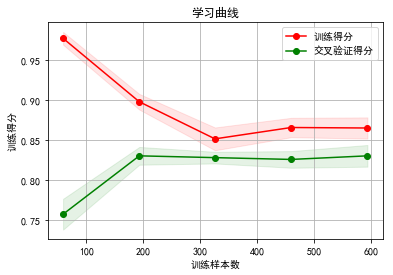

In [62]:
plot_learning_curve(voting_est,u'学习曲线',titanic_train_data_X,titanic_train_data_Y)

In [63]:
test_data_Survived =voting_est.predict(titanic_test_data_X)
submission = pd.DataFrame({'PassengerId':test_data.loc[:,'PassengerId'],'Survived':test_data_Survived})
submission.to_csv('submission_result.csv',index=False,sep=',')

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 750 out of 750 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 750 out of 750 | elapsed:    0.2s finished
c:\python27\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
